In [ ]:
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
print(f'Tensorflow version: {tf.__version__}')
print(f'Keras version: {keras.__version__}')

Tensorflow version: 2.17.1
Keras version: 3.5.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load dữ liệu Fashion Mnist

In [ ]:
# Load dữ liệu
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"Số lượng mẫu trong tập huấn luyện: {X_train.shape}")
print(f"Số lượng mẫu trong tập kiểm tra: {X_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Số lượng mẫu trong tập huấn luyện: (60000, 28, 28)
Số lượng mẫu trong tập kiểm tra: (10000, 28, 28)


In [ ]:
#Khai báo các nhãn
name_class = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#2. Tiền xử lý ảnh

In [ ]:
#Đưa ảnh về chỉ còn 2 giá trị là 0 và 1 và đưa định dạng ảnh vè float32
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#Đưa thông số chiều vào
X_train = np.expand_dims(X_train,-1)
X_test = np.expand_dims(X_test,-1)

In [ ]:
#Chuyển nhãn sang dạng one hot
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

#3. Xây dựng mô hình với mạng CNN

In [ ]:
#Khai báo các biến
input_shape = (28,28,1)

In [ ]:
model = keras.Sequential([
    #Lớp 1
    layers.Conv2D(64,input_shape=input_shape, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #Lớp 2
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    #Lớp Flatten
    layers.Flatten(),
    #Lớp Dense
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,922 (480.16 KB)

 Trainable params: 122,922 (480.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Huấn luyện
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7624 - loss: 0.6653 - val_accuracy: 0.8692 - val_loss: 0.3608
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8761 - loss: 0.3355 - val_accuracy: 0.8881 - val_loss: 0.3051
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8955 - loss: 0.2837 - val_accuracy: 0.8947 - val_loss: 0.2931
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9111 - loss: 0.2453 - val_accuracy: 0.9011 - val_loss: 0.2751
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9172 - loss: 0.2216 - val_accuracy: 0.9027 - val_loss: 0.2743
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9245 - loss: 0.1999 - val_accuracy: 0.9067 - val_loss: 0.2590
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9330 - loss: 0.1779 - val_accuracy: 0.9046 - val_loss: 0.2692
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9392 - loss: 0.1607

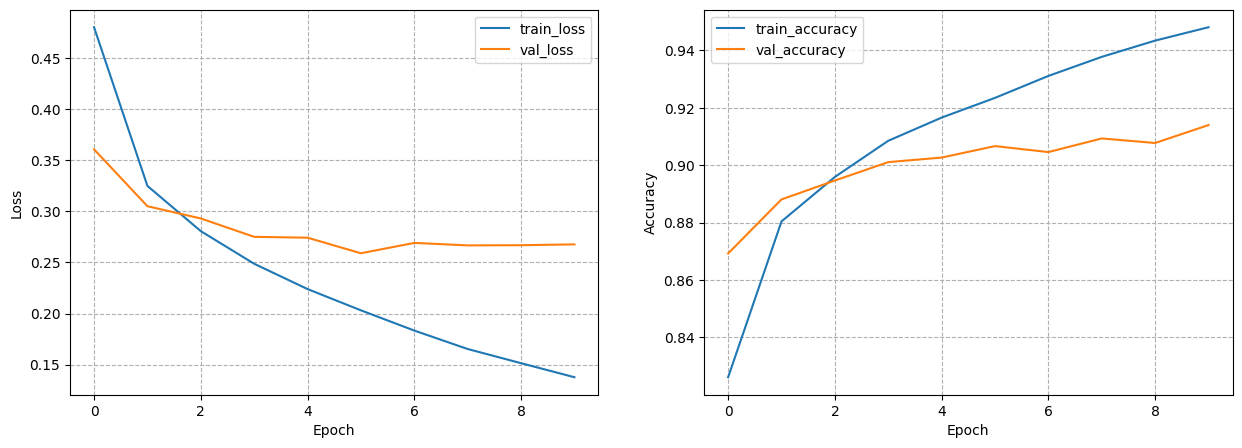

In [ ]:
#Trực quan hoá loss và accuracy
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(history.history['loss'], label='train_loss')
ax[0].plot(history.history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[0].grid(ls='--')

ax[1].plot(history.history['accuracy'], label='train_accuracy')
ax[1].plot(history.history['val_accuracy'], label='val_accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
ax[1].grid(ls='--')

plt.show()

# 4. Đánh giá mô hình

In [ ]:
#Đánh giá mô hình trên tập test
score = model.evaluate(X_test, y_test)
print('Test loss: ',round(score[0],2))
print('Test accuracy:',round(score[1],2))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.3086
Test loss:  0.29
Test accuracy: 0.9


# 5. Dự đoán với dữ liệu mới

In [ ]:
#Dự đoán model với mẫu mới
X_sample = X_test[0:1]
#Dự đoán
y_predict = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 904ms/step


In [ ]:
print(y_predict)

[9]


In [ ]:
#Chuyển từ dữ liệu số thành nhãn
y_predict = np.argmax(y_predict, axis = 1)
label = [name_class[idx] for idx in y_predict]
print(label)

['Ankle boot']


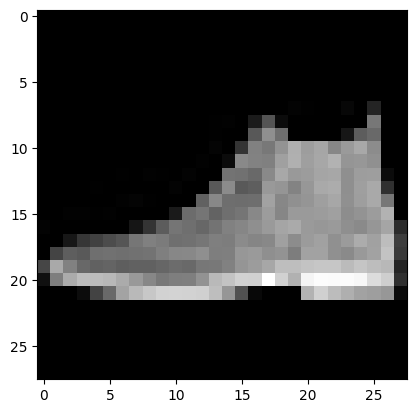

In [ ]:
plt.imshow(X_sample.reshape(28,28), cmap='gray')
plt.show()